In [3]:
# IMPORT STATEMENTS
import cv2
import re
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size
import matplotlib.patches as patches
import matplotlib.colors as colors
import PIL
import math
get_ipython().magic('matplotlib inline')
import pandas as pd
import seaborn as sns
import json
from scipy.stats import fisher_exact, ttest_ind
from collections import Counter
from pprint import pprint
import os
import pickle
import sys
sys.path.append("/booleanfs2/sahoo/Hegemon/")
sys.path = ["/booleanfs2/sahoo/BoNE/"] + sys.path
import StepMiner as smn
import HegemonUtil as hu
acolor = ["#00CC00", "#D8A03D","#EC008C",
          'cyan', "#B741DC", "#808285",
          'blue', 'black', 'green', 'red',
          'orange', 'brown', 'pink', 'purple']

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

try:
    reload  # Python 2.7
except NameError:
    try:
        from importlib import reload  # Python 3.4+
    except ImportError:
        from imp import reload  # Python 3.0 - 3.3

import bone
reload(bone)

<module 'bone' from '/booleanfs2/sahoo/BoNE/bone.py'>

In [4]:
import bone
reload(bone)

class CRCDiffAnalysis(bone.IBDAnalysis):

    def __init__(self):
        bone.IBDAnalysis.__init__(self)

    def getColonGEOPurged(self, tn=1, ta=0, tb=0):
        self.prepareData("CRC145")
        atype = self.h.getSurvName('c Histology')
        atypes = ['N', 'A', 'C']
        ahash = {'Normal':0, 'Adenoma':1, 'Carcinoma':2}
        if (tn == 2):
            atypes = ['N', 'C']
            ahash = {'Normal':0, 'Carcinoma':1}
        self.initData(atype, atypes, ahash)
        return
    
    def getColonGEOPurgedNEJM(self, tn=1, ta=0, tb=0):
        self.prepareData("CRC90")
        atype = self.h.getSurvName('c Histology')
        atypes = ['N', 'A', 'C']
        ahash = {'Normal':0, 'Adenoma':1, 'Carcinoma':2}
        if (tn == 2):
            atypes = ['N', 'C']
            ahash = {'Normal':0, 'Carcinoma':1}
        if (tn == 3):
            atype = self.h.getSurvName('n Age')
            atype = [re.sub("H.*", "", str(k)) for k in atype]
            atype[0] = None
            atype[1] = None
            age = []
            for k in atype:
                if k == None:
                    age += [None]
                elif k == '' or k == 'n Age':
                    age += ['']
                elif float(k) <= 50:
                    age += ['Early']
                else:
                    age += ['Late']
            atypes = ['Early', 'Late', '']
            atype = age
            ahash = {}
        if (tn == 4):
            series = self.h.getSurvName('c Series')
            ah = {'GSE4107', series[0], series[1]}
            atype = [series[i] if series[i] in ah
                     else '' for i in range(len(series))]
            atypes = ['Early', 'Rest']
            ahash = {'GSE4107':0, '':1}
        self.initData(atype, atypes, ahash)
        return
    
    def getQu2016(self, tn=1, ta=0, tb=0):
        self.prepareData("PLP50")
        atype = self.h.getSurvName("c tissue type")
        atypes = ['NS', 'NC', 'A', 'C', 'M']
        ahash = {'Metastasis':4, 'Carcinoma':3,'Normal crypt epithelium':1,
                'Adenoma':2,'Normal surface epithelium':0}
        if (tn == 2):
            atypes = ['NA', 'C']
            ahash = {'Metastasis':1,'Carcinoma':1,'Normal crypt epithelium':0,
                    'Adenoma':0,'Normal surface epithelium':0}
        if (tn == 3):
            atypes = ['N', 'C']
            ahash = {'Carcinoma':1,'Normal crypt epithelium':0}
        self.initData(atype, atypes, ahash)
        return

    def getTCGACRC(self, tn=1):
        self.prepareData("CRC80")
        atype = self.h.getSurvName('c Histology')
        atypes = ['N', 'PT', 'RT', 'M']
        ahash = {'Primary Tumor':1, 'Solid Tissue Normal':0, 'Metastatic':3,
                'Recurrent Tumor':2}
        if (tn == 2):
            atypes = ['N', 'T']
            ahash = {'Primary Tumor':1, 'Solid Tissue Normal':0}
        self.initData(atype, atypes, ahash)
        return

    def getHanley2017(self, tn=1):
        self.prepareData("CRC91")
        atype = self.h.getSurvName('c tissue')
        atypes = ['N', 'AN', 'PT', 'AC']
        ahash = {'adjacent normal colon':1, 'primary tumor':2,
                 'normal colonic crypt':0, 'aberrant crypt foci':3}
        if (tn == 2):
            atypes = ['N', 'T']
            ahash = {'primary tumor':1,'normal colonic crypt':0}
        self.initData(atype, atypes, ahash)
        return

    def getSkrzypczak2010(self, tn=1):
        self.prepareData("CRC137.2")
        atype = self.h.getSurvName('c tissue')
        atypes = ['N', 'A', 'C', 'AC']
        ahash = {'adenoma':1, 'adenocarcinoma':3, 'normal colon':0, 'colon tumor':2}
        if (tn == 2):
            atypes = ['N', 'T']
            ahash = {'normal colon':0, 'adenocarcinoma':1}
        self.initData(atype, atypes, ahash)
        return
    
    def getParedes2020CRC(self, tn=1, tb=0):
        self.prepareData("CRC148")
        atype = self.h.getSurvName('c individual')
        atype = [re.sub("_.*", "", str(k)) for k in atype]
        ahash = {'Caucasian':0, 'AfricanAmerican':1}
        tval = [ahash[i] if i in ahash else None for i in atype]
        atype = self.h.getSurvName('c tissue')
        atype = [re.sub(" .*", "", str(k)) for k in atype]
        atypes = ['N', 'T']
        ahash = {'Tumor':1, 'Adjacent':0}
        aval = [ahash[i] if i in ahash else None for i in atype]
        if (tn == 2):
            atype = [atype[i] if tval[i] == tb
                    else None for i in range(len(atype))]
        if (tn == 3):
            atypes = ['C', 'AA']
            atype = tval
            ahash = {0:0, 1:1}
            atype = [atype[i] if aval[i] == tb
                    else None for i in range(len(atype))]
        self.initData(atype, atypes, ahash)

    def getSole2014(self, tn=1):
        self.prepareData("CRC149")
        atype = self.h.getSurvName('c sample type')
        atypes = ['N', 'T', 'M']
        ahash = {'Normal':0, 'Tumor':1, 'Mucosa':2}
        if (tn == 2):
            atypes = ['N', 'T']
            ahash = {'Normal':0, 'Tumor':1}
        self.initData(atype, atypes, ahash)
        return

    def getMusella2013(self, tn=1, tb=0):
        self.prepareData("CRC150")
        atype = self.h.getSurvName('c time point')
        ahash = {'T0':0, 'T1':1, 'T2':2, 'T3':3}
        tval = [ahash[i] if i in ahash else None for i in atype]
        atype = self.h.getSurvName('c tissue')
        atypes = ['N', 'T']
        ahash = {'Normal colon tissue':0, 'Colorectal cancer tissue':1}
        if (tn == 2):
            atype = [atype[i] if tval[i] == tb
                    else None for i in range(len(atype))]
        self.initData(atype, atypes, ahash)
        return    

    def getChen2016(self, tn=1, tb=0):
        self.prepareData("CRC154")
        atype = self.h.getSurvName('c src1')
        atypes = ['N', 'I', 'II', 'III', 'IV']
        ahash = {'CRC_FFPE_stage III':3, 'CRC_FFPE_stage II':2,
                 'CRC_FFPE_stage IV':4, 'CRC_FFPE_stage I':1,
                 'CRC_FFPE_healthy control':0}
        if (tn == 2):
            atypes = ['N', 'T']
            ahash = {'CRC_FFPE_stage III':1, 'CRC_FFPE_stage II':1,
                     'CRC_FFPE_stage IV':1, 'CRC_FFPE_stage I':1,
                     'CRC_FFPE_healthy control':0}
        self.initData(atype, atypes, ahash)
        return

    def getPG2021CRC(self, tn=1, ta=0):
        self.prepareData("PG60",
                "/mnt/Users/sataheri/public_html/Hegemon/explore.conf")
        atype = self.h.getSurvName('c Cell protocol')
        atypes = ['Un', 'PF']
        ahash = {'HCT116 PF':1, 'HCT116':0, 'SW480 PF':1, 'SW480':0}
        if (tn == 2):
            ahash = {'HCT116 PF':1, 'HCT116':0}
        if (tn == 3):
            ahash = {'SW480 PF':1, 'SW480':0}
        if (tn == 4):
            atypes = ['HCT116', 'HCT116 PF', 'SW480', 'SW480 PF']
            ahash = {}
        self.initData(atype, atypes, ahash)
        return

    def getPG2021CRCxeno(self, tn=1, ta=0):
        self.prepareData("PG20",
                "/mnt/Users/dtv004/public_html/Hegemon/explore.conf")
        atype = self.h.getSurvName('c Type')
        atypes = ['Un', 'PF']
        ahash = {'Xenograft_control':0, 'Xenograft_PF_treated':1}
        self.initData(atype, atypes, ahash)
        return

    def getPG2020PolypDiffMm(self, tn=1, ta=0):
        self.prepareData("PG1.5",
                "/mnt/Users/dtv004/public_html/Hegemon/explore.conf")
        atype = self.h.getSurvName('c Type')
        atypes = ['Un', 'UN+PF', 'FN', 'FN+PF']
        ahash = {}
        if (tn == 2):
            atypes = ['Un', 'UN+PF']
        self.initData(atype, atypes, ahash)
        return

    def getPG2020PolypDiffHs(self, tn=1, ta=0):
        self.prepareData("PG1",
                "/mnt/Users/dtv004/public_html/Hegemon/explore.conf")
        atype = self.h.getSurvName('c Type')
        atypes = ['Un', 'PF']
        ahash = {'PF treated':1, 'untreated':0}
        self.initData(atype, atypes, ahash)
        return
    
    def getPG2022PDO(self, tn=1, ta=0):
        self.prepareData("PG132",
                "/Users/sataheri/public_html/Hegemon/explore.conf")
        atype = self.h.getSurvName('c PF-Type')
        atypes = ['Un', 'PF']
        ahash = {'cntrl_Healthy':0, 'cntrl_Sensetive':0, 'treated_Healthy':1,
                 'treated_Resistant':1, 'cntrl_Resistant':0, 'treated_Sensetive':1}
        if tn == 2:
            ahash = {'cntrl_Sensetive':0, 'treated_Sensetive':1}
        if tn == 3:
            atypes = ['S', 'R']
            ahash = {'treated_Resistant':1, 'treated_Sensetive':0}
        if tn == 4:
            atypes = ['Rc', 'Rt']
            ahash = {'cntrl_Resistant':0, 'treated_Resistant':1}
        if tn == 5:
            atypes = ['Sc', 'St']
            ahash = {'cntrl_Sensetive':0, 'treated_Sensetive':1}
        self.initData(atype, atypes, ahash)
        return
         
    def getJung2011(self, tn=1):
        self.prepareData("CRC110")
        h = self.h
        atype = h.getSurvName('c ephb2 surface abundance')
        atypes = ['EPHB2 neg', 'EPHB2 low', 'EPHB2 medium', 'EPHB2 high']
        ahash = {}
        if (tn == 2):
            atypes = ['Bottom', 'Top']
            ahash = {'EPHB2 neg':1, 'EPHB2 low':1, 'EPHB2 medium':0, 'EPHB2 high':0}
        self.initData(atype, atypes, ahash)
        return

    def getMerlosSuarez2011(self, tn=1):
        self.prepareData("CRC109")
        h = self.h
        atype = h.getSurvName('c group')
        atypes = ['EphB2 High', 'EphB2 Medium', 'EphB2 Low', 'Lgr5 High', 'Lgr5 Low']
        ahash = {}
        if (tn == 2):
            atypes = ['Bottom', 'Top']
            ahash = {'EphB2 High':0, 'EphB2 Medium':1, 'EphB2 Low':1, 'Lgr5 High':0,
                    'Lgr5 Low':1}
        self.initData(atype, atypes, ahash)
        return

    def getGao(self, tn=1):
        self.prepareData("PLP34")
        atype = self.h.getSurvName("c group")
        atypes = ['C', 'D', 'A', 'A/D']
        ahash = {'control': 0, 'DSS': 1, 'AOM': 2, 'AOM/DSS': 3}
        if (tn == 2):
            atypes = ['C', 'A/D']
            ahash = {'control': 0, 'AOM/DSS': 1}
        self.initData(atype, atypes, ahash)
        return

    def getCRCCellLines(self, tn=1):
        self.prepareData("CRC102")
        atype = self.h.getSurvName("c Type")
        atypes = ['HCT116', 'SW480', 'DLD1', 'CACO2']
        ahash = {}
        self.initData(atype, atypes, ahash)
        return

    def getAstraZeneca2014CellLines(self, tn=1):
        self.prepareData("COV218")
        atype = self.h.getSurvName("c cell line")
        atypes = ['HCT116', 'SW480', 'DLD1', 'CACO2']
        ahash = {}
        self.initData(atype, atypes, ahash)
        return

    def getGenentechCellLines(self, tn=1):
        self.prepareData("GL9")
        atype = self.h.getSurvName("c Cell_line")
        atypes = ['HCT 116', 'SW 480', 'DLD-1', 'Caco-2']
        ahash = {}
        self.initData(atype, atypes, ahash)
        return

    def getCCLECellLines(self, tn=1):
        self.prepareData("GL11")
        atype = self.h.getSurvName("c Title")
        atypes = ['HCT 116', 'SW480', 'DLD-1']
        ahash = {}
        self.initData(atype, atypes, ahash)
        return

    def getStinson2011CellLines(self, tn=1):
        self.prepareData("CRC139")
        atype = self.h.getSurvName("c Title")
        atype = [re.sub(".*for ", "", str(k)) for k in atype]
        atype = [re.sub(" .*", "", str(k)) for k in atype]
        atypes = ['HCT116', 'SW480', 'DLD1', 'CACO2']
        ahash = {}
        self.initData(atype, atypes, ahash)
        return

    def getLeclerc2004(self):
        self.prepareData("PLP45")
        atype = self.h.getSurvName("c src1")
        atypes = ['N', 'T']
        ahash = {'Normal intestine':0, 'Tumor':1}
        self.initData(atype, atypes, ahash)
        return

    def getPeck2015(self, tn=1):
        self.prepareData("PLP70")
        inflamed = self.h.getSurvName("c inflamed")
        etype = self.h.getSurvName("c Type")
        atype = self.h.getSurvName("c disease_stage")
        atypes = ['NA', 'B1', 'B2', 'B3']
        ahash = {'B1/non-strictuing, non-penetrating':1,
                'B3/penetrating':3,
                'NA':0,
                'B2/stricturing':2}
        if (tn == 2):
            atype = inflamed
            atypes = ['No', 'Yes']
            ahash = {}
        atype = [atype[i] if etype[i] == "RNA-Seq"
                 else None for i in range(len(atype))]
        self.initData(atype, atypes, ahash)
        return

    def getDelRoy(self):
        self.prepareData("CRC101")
        atype = self.h.getSurvName('c Status')
        atypes = ['R', 'NR']
        ahash = {}
        self.initData(atype, atypes, ahash)
        return

    def getMcNeil2016(self, tn=1):
        self.prepareData("PLP43")
        atype = self.h.getSurvName("c Stage")
        atypes = ['U', 'P', 'I', 'LT']
        ahash = {'p52':3, 'p5':1, 'p8':2, 'p51':3, 'p0':0, 'p3':1,
                'p66':3, 'p6':2, 'p54':3, 'p7':2, 'p55':3, 'p58':3}
        if (tn == 2):
            atypes = ['U', 'LT']
            ahash = {'p52':1, 'p51':1, 'p0':0,
                    'p66':1, 'p54':1, 'p55':1, 'p58':1}
        self.initData(atype, atypes, ahash)
        return

    def getNeufert2013(self, tn=1):
        self.prepareData("PLP44")
        atype = self.h.getSurvName("c src1")
        atypes = ['CS', 'CC', 'TS', 'TC']
        ahash = {'colorectal control epithelium_colitis-associated':1,
                'colorectal tumor_colitis-associated':2,
                'colorectal control epithelium_sporadic':0,
                'colorectal tumor_sporadic':3}
        if (tn == 2):
            atypes = ['N', 'T']
            ahash = {'colorectal control epithelium_colitis-associated':0,
                    'colorectal tumor_colitis-associated':1,
                    'colorectal control epithelium_sporadic':0,
                    'colorectal tumor_sporadic':1}
        self.initData(atype, atypes, ahash)
        return

    def getLopezDee2012(self, tn=1):
        self.prepareData("PLP49")
        gtype = self.h.getSurvName("c genotype/variation")
        atype = self.h.getSurvName("c src1")
        atypes = ['WC', 'TC', 'WD', 'TD', 'WDS', 'WDST2', 'WDST3', 'WRFK',
                'WT', 'TN']
        ahash = {'Wt, water control':0,
                'TSP-null-water':1,
                'Wt, DSS treated':2,
                'DSS-treated TSP-null':3,
                'Wt, DSS-saline treated':4,
                'Wt, DSS-TSR2 treated':5,
                'Wt, DSS-3TSR treated':6,
                'Wt, DSS-TSR+RFK treated':7}
        if (tn == 2):
            atypes = ['WC', 'WD']
            ahash = {'Wt, water control':0,
                    'Wt, DSS treated':1}
        self.initData(atype, atypes, ahash)
        return

    def getTang2012(self, tn=1):
        self.prepareData("PLP40")
        atype = self.h.getSurvName("c disease state")
        atypes = ['N', 'I', 'LD', 'HD', 'C'];
        ahash = {'low grade dysplasia lesion':2,
                'inflamed colorectal mucosa':1,
                'high grade dysplasia':3,
                'normal':0,
                'colorectal adenocarcinoma':4}
        if (tn == 2):
            atypes = ['N', 'I'];
            ahash = {'inflamed colorectal mucosa':1,
                    'normal':0}
        self.initData(atype, atypes, ahash)
        return

    def getJensen2017(self):
        self.prepareData("PLP66")
        atype = self.h.getSurvName("c disease")
        atypes = ['normal', 'colitis']
        ahash = {}
        self.initData(atype, atypes, ahash)
        return

    def getGkouskou2016(self, tn=1):
        self.prepareData("PLP84")
        tissue = self.h.getSurvName("c tissue")
        ahash = {'proximal colon':3, 'distal colon':4}
        rval = [ahash[i] if i in ahash else None for i in tissue]
        atype = self.h.getSurvName("c src1")
        atypes = ['normal', 'AD2', 'AD4', 'proximal', 'distal']
        ahash = {'UNTREATED':0, 'AOM, 4 DSS CYCLES':2, 'AOM, 2 DSS CYCLES':1}
        if (tn == 2):
            atypes = ['N', 'DSS']
            ahash = {'UNTREATED':0, 'AOM, 4 DSS CYCLES':1, 'AOM, 2 DSS CYCLES':1}
        self.initData(atype, atypes, ahash)
        return

    def getBelmont(self, tn=1):
        self.prepareData("PLP41")
        atype = self.h.getSurvName("c genotype")
        atypes = ['Normal', 'Adenoma', 'Cancer']
        ahash = {'wild type':0, 'APC mutant': 1, 'APC KRAS mutant': 2}
        if (tn == 2):
            atypes = ['Normal', 'APC']
            ahash = {'wild type':0, 'APC mutant': 1}
        if (tn == 3):
            atypes = ['N', 'APC/KRAS']
            ahash = {'wild type':0, 'APC KRAS mutant': 1}
        if (tn == 4):
            atypes = ['N', 'APC/BRAF']
            ahash = {'wild type':0, 'APC BRAF mutant': 1}
        if (tn == 5):
            atypes = ['N', 'APC/BRAF/P53']
            ahash = {'wild type':0, 'APC BRAF P53 mutant': 1}
        self.initData(atype, atypes, ahash)
        return


In [3]:
cfile = "/mnt/booleanfs2/sahoo/Data/Colon/BN/grants/crc-net-1-res.txt"
nodes, edges = bone.BIGraph.readEqGraph(cfile)
df = bone.BIGraph.pruneEqGraph(edges)
# df.to_csv("/mnt/booleanfs2/sahoo/Data/Colon/BN/grants/crc-net-1-eq.txt", sep="\t", header=False, index=False)
thr = hu.getThrData(df[1])
print(thr)
cls = bone.BIGraph.getClusters(df, 0.7)
# bone.BIGraph.saveClusters("/mnt/booleanfs2/sahoo/Data/Colon/BN/grants/crc-net-1-cls.txt", cls)
cls = bone.BIGraph.readClusters("/mnt/booleanfs2/sahoo/Data/Colon/BN/grants/crc-net-1-cls.txt")
cfile = "/mnt/booleanfs2/sahoo/Data/Colon/BN/grants/crc-net-1.rl"
net = bone.BINetwork(cfile)
net.init()
cg = bone.BIGraph.getClustersGraph(net, cls)
# cg.to_csv("/mnt/booleanfs2/sahoo/Data/Colon/BN/grants/crc-net-1-eq-g.txt", sep="\t", header=False, index=False)
edges, clusters, nodep = bone.BIGraph.readClustersGraphFile("/mnt/booleanfs2/sahoo/Data/Colon/BN/grants/crc-net-1")
clusters[nodep['PRKAB1']]


285706 edges Processed
[0.44072559214353313, 3614.470274119544, -0.05927440785646687, 0.9407255921435331]860 4860 4860 4860 4860 48604860 4860 48604860 4860 4860 4860 4860 486048604860 4860 4860 4860 4860 4860 4860 4860 4860 4860 4860 4860 4860 4860 4860 4860 4860 4860 4860 48604860 4860 4860 4860 4860 4860 486048604860 4860 4860 4860 4860 4860 4860 4860 4860 4860 4860 4860 4860 4860 4860 4860 4860 4860 4860 4860 4860 4860 4860 4860 4860 4860 48604860 4860 4860 4860 4860 4860 4860 4860 4860 4860 4860 4860 4860 4860 4860 4860 4860 4860 4860 4860 4860 4860 4860 48604860 4860 4860 4860 4860 4860 4860 4860 4860 4860 4860 4860 4860 4860 4860 4860 4860 4860 4860 4860 48604860
4263 Processed
Processing edges...
492905 edges processed


['PRKAB1']

In [4]:
def clusterNodes(edges, nodes):
    from networkx.utils.union_find import UnionFind as UF
    x = UF()
    for k in nodes:
        if k in edges:
            if "5" in edges[k]:
                for l in edges[k]["5"]:
                    x.union(k, l)
    cls = {}
    for k in x:
        p = x[k]
        if (p not in cls):
            cls[p] = []
        cls[p].append(k)
    cls1 = {}
    for k in cls:
        lh = {}
        s1 = set(cls[k])
        for l in s1:
            lh[l] = 1
        s2 = []
        for l in s1:
            if l not in edges:
                break;
            if "5" not in edges[l]:
                break;
            lh[l] = len(set(edges[l]["5"]).intersection(s1))
            if lh[l] > 0:
                s2.append(l)
        #print([ (k,lh[k]) for k in sorted(s1, key=lambda k: -lh[k])])
        cls1[k] = sorted(s1, key=lambda k: -lh[k])
    return cls1

def searchDeep(edges, start, n = 8, term = "PRKAB1", et='2'):
    import queue
    lQ = queue.Queue()
    depth = {}
    visited = {}
    cls2 = {}
    parent = {}
    if et not in edges[start]:
        return cls2, cls2, parent
    nodes = edges[start][et]
    #nodes = {k:v for i in edges[start] for k,v in edges[start][i].items()}
    cls = clusterNodes(edges, nodes)
    for k in cls:
        #print(cls[k][0], len(cls[k]), "PRKAB1" in cls[k])
        cls2[cls[k][0]] = cls[k]
        lQ.put(cls[k][0])
        depth[cls[k][0]] = 1
        parent[cls[k][0]] = start
    while (not lQ.empty()):
        l = lQ.get()
        if l in visited:
            continue;
        visited[l] = 1
        if depth[l] > n:
            continue;
        if l not in edges:
            continue;
        if et not in edges[l]:
            continue;
        ns = edges[l][et]
        #ns = {k:v for i in edges[l] for k,v in edges[l][i].items()}
        cls = clusterNodes(edges, ns)
        for k in cls:
            if cls[k][0] not in depth:
                #print(cls[k][0], len(cls[k]), depth[l]+1, "PRKAB1" in cls[k])
                cls2[cls[k][0]] = cls[k]
                lQ.put(cls[k][0])
                depth[cls[k][0]] = depth[l] + 1
                parent[cls[k][0]] = l

    cls3 = {}
    for k in cls2:
        print("A", k, len(cls2[k]), depth[k], parent[k], term in cls2[k])
        for l in cls2[k]:
            cls3[l] = 1

    cls = clusterNodes(edges, cls3)
    for k in cls:
        print("B", cls[k][0], len(cls[k]), term in cls[k])
    
    return cls2, cls3, parent

cls2, cls3, parent = searchDeep(edges, "CDX2", 2, nodep["PRKAB1"])

"GPD1L" in cls2['KCTD5']

cls = clusterNodes(edges, edges['GPD1L']['4'])
cls2[cls['IGFBP3'][0]] = cls['IGFBP3']
print ('A', cls['IGFBP3'][0], len(cls2[cls['IGFBP3'][0]]), 1, 'KCTD5', 'CCDC88A' in cls2[cls['IGFBP3'][0]])


A MGAT4B 21 1 CDX2 False
A EPB41L4B 21 1 CDX2 True
A KCTD5 186 2 MGAT4B True
A MUPCDH 3 2 MGAT4B False
A ABCC13 2 2 EPB41L4B False
A PSPC1 391 3 KCTD5 False
A FUCA1 108 3 MUPCDH False
A SCNN1B 37 3 ABCC13 False
B YEATS4 1890 True
A LAYN 291 1 KCTD5 True


In [16]:
l1 = ["CDX2", 'MGAT4B', 'EPB41L4B', 'KCTD5', 'MUPCDH', 'PSPC1', 'FUCA1', 'LAYN']
def writeNodes(l1):
    cls = bone.BIGraph.readClusters("/mnt/booleanfs2/sahoo/Data/Colon/BN/grants/crc-net-1-cls.txt")
    for k in range(len(l1)):
        cfile = "node-" + str(k+1) + ".txt"
        print(cfile)
        if k == 0:
            s1 = ["CDX2"]
        else:
            s1 = hu.uniq(sum([cls[i][1] for i in cls2[l1[k]]], []))
        print(len(s1))
        ofp = open(cfile, "w")
        for m in s1:
            ofp.write(m + "\n")
        ofp.close()
    return
writeNodes(l1)

node-1.txt
1
node-2.txt
21
node-3.txt
21
node-4.txt
209
node-5.txt
3
node-6.txt
431
node-7.txt
109
node-8.txt
363


In [5]:
for k in cls2:
    print(k)
print("----------")
for k in parent:
    print(k)

MGAT4B
EPB41L4B
KCTD5
MUPCDH
ABCC13
PSPC1
FUCA1
SCNN1B
LAYN
----------
MGAT4B
EPB41L4B
KCTD5
MUPCDH
ABCC13
PSPC1
FUCA1
SCNN1B


In [18]:
cls2['ABCC13'] 

['ABCC13', 'UGT1A6']

MGAT4B EPB41L4B KCTD5 MUPCDH ABCC13 PSPC1 FUCA1 SCNN1B LAYN ['ABCC13', 'UGT1A6']


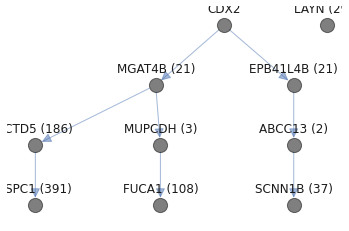

In [19]:

import networkx as nx
from networkx.drawing.nx_agraph import write_dot, graphviz_layout
attr_edge = []
vertices = ["CDX2"]
for k in cls2:
    vertices.append(k)
    if k in parent.keys():
        attr_edge.append([parent[k], k, {"type": 2}])
G = nx.DiGraph()
G.add_nodes_from(vertices)
G.add_edges_from(attr_edge)
pos = graphviz_layout(G, prog='dot')
cm = {2: "b", 1: "g", 3: "r"}
colors = [cm[G[u][v]['type']] for u,v in G.edges()]
pos_higher = {}
labels = {}
for k, v in pos.items():
    pos_higher[k] = (v[0], v[1]+20)
for v in vertices:
    if(v not in labels):
        labels[v] = ""
    if v in cls2:
        labels[v] = v + " (" + str(len(cls2[v])) +")" 
    else:
        labels[v] = v
def ishold():
    return False
def hold(x):
    return False
def is_string_like(s):
    return isinstance(s, str)
def is_numlike(s):
    import numbers
    return isinstance(s, numbers.Number)
plt.ishold = ishold
plt.hold = hold
matplotlib.cbook.is_string_like = is_string_like
matplotlib.cbook.is_numlike = is_numlike

nx.draw_networkx_labels(G, pos_higher, labels)
nx.draw(G, pos, arrowsize=20, #arrowstyle="fancy",
        node_size=200, alpha=0.5, node_color="black", edge_color=colors)

print(" ".join(cls2.keys()), cls2['ABCC13'] )

In [20]:
cls2['ABCC13'] # both are eqv

['ABCC13', 'UGT1A6']

Qu 2016 Normal Adenoma Cancer (n = 58)
GSE77953 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PLP50
58 [30, 28] GSE77953 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PLP50 PLP50
[1]
[2]
[2]
[1]
[5]
[4]
[1]
[3]
[1]
[2]
[3]
[1]
[1]
[1]
[3]
[1]
[2]
[3]
[2]
[2]
[0]
[1]
[1]
[0]
[1]
[3]
[2]
[1]
[6]
[1]
[1]
[0]
[2]
[4]
[1]
[3]
[0]
[0]
[1]
[4]
[0]
[6]
[1]


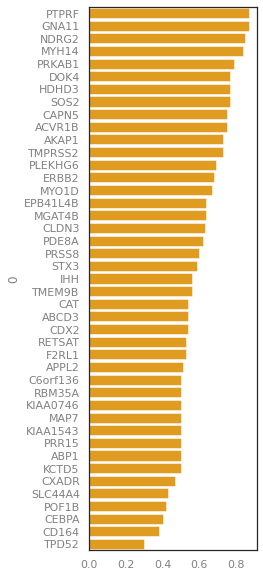

In [8]:
nodes = ['CDX2'] + cls2['EPB41L4B'] + cls2['MGAT4B']
ana = CRCDiffAnalysis()
ana.getQu2016(2)
res = []
for i in range(len(nodes)):
    wt1, lt1 = [-1], [[nodes[i]]]
    ana.orderData(lt1, wt1)
    #print("index = ", i, nodes[i], ana.getROCAUC())
    res += [[nodes[i], ana.getROCAUC()]]
df = pd.DataFrame(res)
df = df.sort_values(1, ascending=False)
# print(list(df.sort_values(1, ascending=False)[0])[0:5])
df.index = df[0]
df = df[[1]]
cfile = "Figs1-F.pdf"
pdf = bone.getPDF(cfile)
sns.set()
sns.set_style("white")
sns.set_style({'xtick.color':'.5', 'ytick.color':'.5', 'axes.labelcolor': '.5'})
sns.set_context("notebook")
sns.set_palette([bone.adj_light(c, 1.5, 1) for c in acolor])
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(3,10))
sns.barplot(ax=ax, data=df.T, orient='h', color='orange', ci=None, linewidth=.5)
pdf.savefig(transparent=True, bbox_inches = 'tight')
bone.closePDF(pdf)

In [11]:
print(df.head(5).index)
df.head(5)

Index(['PTPRF', 'GNA11', 'NDRG2', 'MYH14', 'PRKAB1'], dtype='object', name=0)


,1
0,
PTPRF,0.87
GNA11,0.87
NDRG2,0.85
MYH14,0.84
PRKAB1,0.79


Qu 2016 Normal Adenoma Cancer (n = 58)
GSE77953 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PLP50
58 [30, 28] GSE77953 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PLP50 PLP50
[18]
ROC-AUC 0.93
[9.019780882029826, 45.658018596946874, 8.519780882029826, 9.519780882029826]
0.920046934106826 9.939827816136653
Global 2018 GPL570 Colon Purged (n = 1911)
GEO CRC115 http://hegemon.ucsd.edu/Tools/explore.php?key=colon&id=CRC145
1832 [170, 1662] GEO CRC115 http://hegemon.ucsd.edu/Tools/explore.php?key=colon&id=CRC145 CRC145
[5]
ROC-AUC 0.68
[0.9772307028277453, 1065.1151681885608, 0.47723070282774527, 1.4772307028277454]
0.48033803131534303 1.4575687341430883
TCGA 2017 CRC mRNA (n = 698)
TCGA http://hegemon.ucsd.edu/Tools/explore.php?key=colon&id=CRC80
695 [51, 644] TCGA http://hegemon.ucsd.edu/Tools/explore.php?key=colon&id=CRC80 CRC80
[5]
ROC-AUC 0.90
[1.057738670799412, 258.137843755836, 0.5577386707994121, 1.557738670799412]
0.5518490678944117 1.6095877386938238
Skrzy

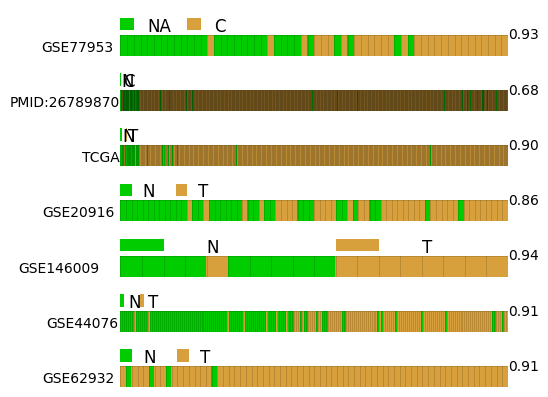

In [5]:
cfile = "Figs1-G.pdf"
pdf = bone.getPDF(cfile)
fig,axlist = plt.subplots(ncols=1, nrows=7, figsize=(5,5), dpi=100)
wt1, l1 = [-1], [['PTPRF', 'GNA11', 'NDRG2', 'MYH14', 'PRKAB1']]
ana = CRCDiffAnalysis()
ana.getQu2016(2)
def plotBar(ana, axlist, l1, wt1, n1):
    name=ana.h.getSource()
    if n1==1:
        name='PMID:26789870'
        
    c_dict, fpr, tpr, roc_auc = bone.processGeneGroups(ana, l1, wt1, fthr="thr2")
    params = {'spaceAnn': 10, 'tAnn': 2, 'widthAnn':2, 'acolor': acolor,
              'w': 5, 'h': 0.8, 'atypes': ana.atypes ,'cval': ana.cval, 'ax': axlist[n1]}
    ax = ana.printTitleBar(params)
    res = "%.2f" % roc_auc
    ax.text(len(ana.cval[0]), 4, res)
    ax.text(-1, 2, name, horizontalalignment='right',
            verticalalignment='center')
    return
plotBar(ana, axlist, l1, wt1, 0)
ana.getColonGEOPurged(2)
plotBar(ana, axlist, l1, wt1, 1)
ana.getTCGACRC(2)
plotBar(ana, axlist, l1, wt1, 2)
ana.getSkrzypczak2010(2) # use the latest version.
plotBar(ana, axlist, l1, wt1, 3)
ana.getParedes2020CRC(2, 0)
plotBar(ana, axlist, l1, wt1, 4)
ana.getSole2014(2)
plotBar(ana, axlist, l1, wt1, 5)
ana.getChen2016(2)
plotBar(ana, axlist, l1, wt1, 6)
pdf.savefig(transparent=True, bbox_inches = 'tight')
bone.closePDF(pdf)